<a href="https://colab.research.google.com/github/SujayVivek/MLSP-Lab-8th-Sem-2026/blob/main/IlluminationYaleExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the cell above and authenticating with your Google account, your Google Drive will be mounted at `/content/drive`.

Now, you need to update the `data_path` variable in the next cell to point to the specific folder within your Google Drive where your `.pgm` images are located. For example, if your images are in a folder named `MyImageData` directly in your Google Drive, the path would be `/content/drive/MyDrive/MyImageData`.

In [10]:
# Path to folder
# Uncomment the line below and update the path to your data folder in Google Drive
data_path = "/content/drive/MyDrive/MLSP8SemData/Data/Data"

# Get all .pgm files
image_files = sorted([f for f in os.listdir(data_path) if f.endswith(".pgm")])

print("Total images found:", len(image_files))

images = []

for file in image_files:
    img = Image.open(os.path.join(data_path, file))
    img = np.array(img, dtype=np.float64)
    images.append(img)

images = np.array(images)

print("Image shape:", images.shape)

Total images found: 65
Image shape: (65, 168, 192)


In [11]:
M, H, W = images.shape
D = H * W

# Vectorize
Gamma = images.reshape(M, D).T   # Shape: D x M

# Mean face
Psi = np.mean(Gamma, axis=1, keepdims=True)

# Centered images
Phi = Gamma - Psi

print("Gamma shape:", Gamma.shape)
print("Mean face shape:", Psi.shape)
print("Centered matrix shape:", Phi.shape)


Gamma shape: (32256, 65)
Mean face shape: (32256, 1)
Centered matrix shape: (32256, 65)


In [12]:
# Compute reduced covariance matrix L = A^T A
L = Phi.T @ Phi   # Shape: M x M

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Sort in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Compute eigenfaces
U = Phi @ eigenvectors

# Normalize eigenfaces
for i in range(U.shape[1]):
    U[:, i] = U[:, i] / np.linalg.norm(U[:, i])

print("Eigenfaces shape:", U.shape)


Eigenfaces shape: (32256, 65)


In [13]:
# Select 8 uniformly spaced indices
selected_indices = np.linspace(0, M-1, 8, dtype=int)

print("Selected image indices:", selected_indices)


Selected image indices: [ 0  9 18 27 36 45 54 64]


In [14]:
def reconstruct_image(Phi_img, K):
    U_k = U[:, :K]
    weights = U_k.T @ Phi_img
    reconstruction = Psi + U_k @ weights
    return reconstruction

# Store MSE results
mse_results = {}

for idx in selected_indices:
    mse_list = []
    Phi_img = Phi[:, idx:idx+1]
    original = Gamma[:, idx:idx+1]

    for K in range(1, 81):
        recon = reconstruct_image(Phi_img, K)
        mse = np.mean((original - recon) ** 2)
        mse_list.append(mse)

    mse_results[idx] = mse_list

print("MSE computation complete.")


MSE computation complete.


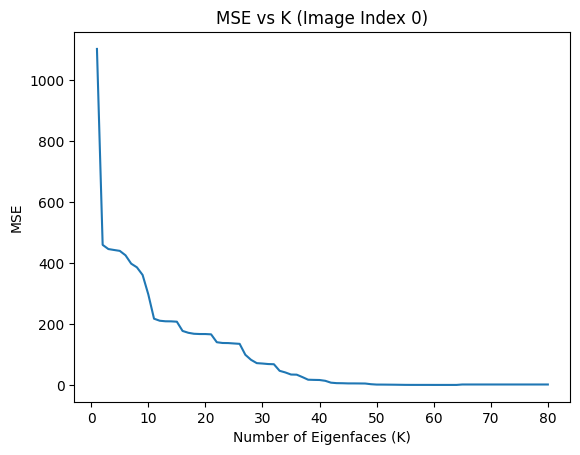

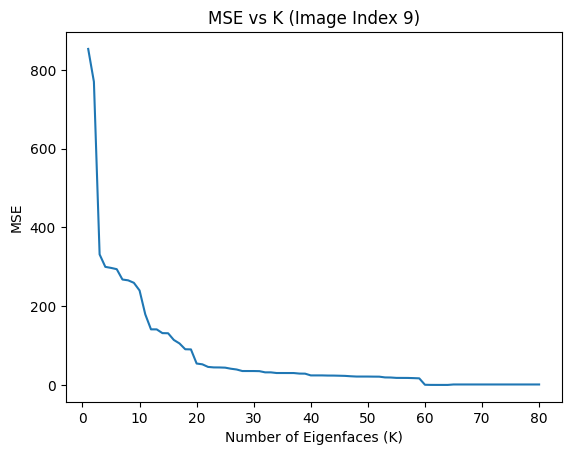

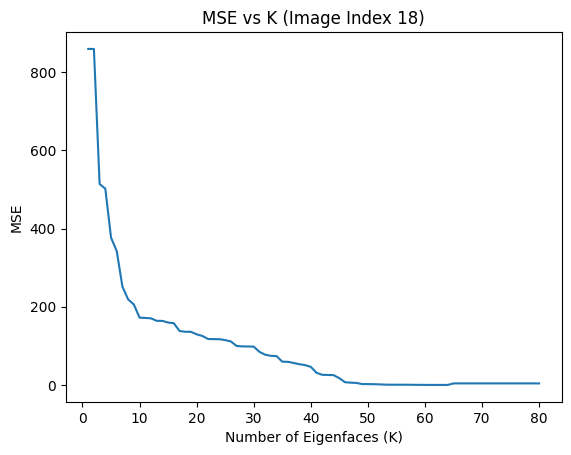

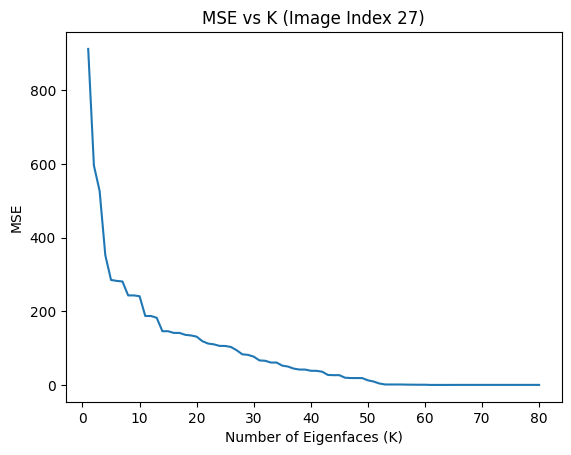

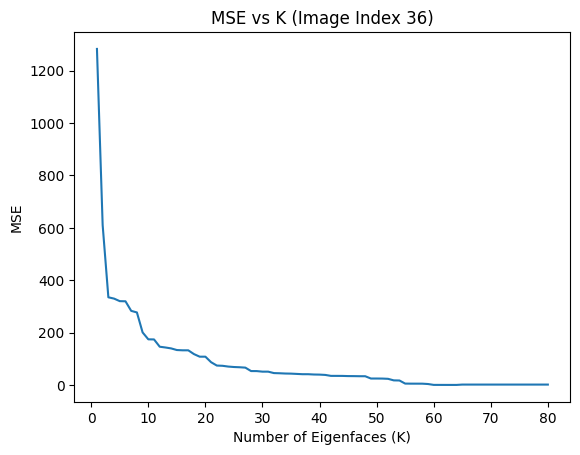

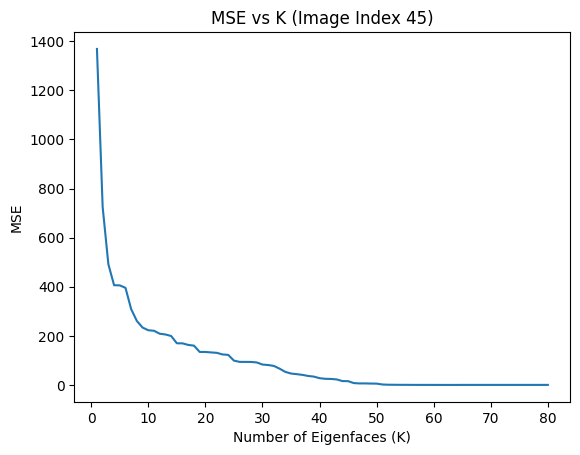

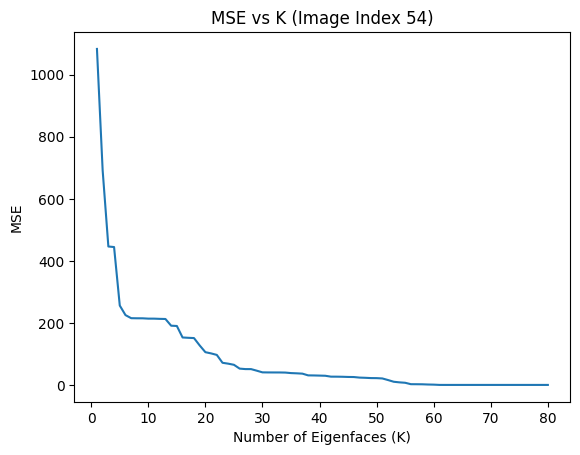

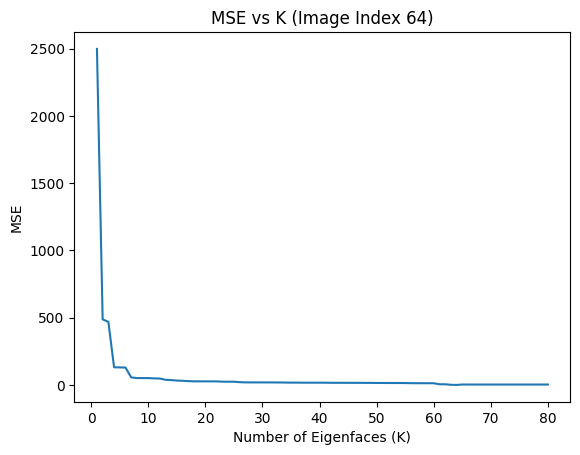

In [15]:
for idx in selected_indices:
    plt.figure()
    plt.plot(range(1, 81), mse_results[idx])
    plt.xlabel("Number of Eigenfaces (K)")
    plt.ylabel("MSE")
    plt.title(f"MSE vs K (Image Index {idx})")
    plt.show()


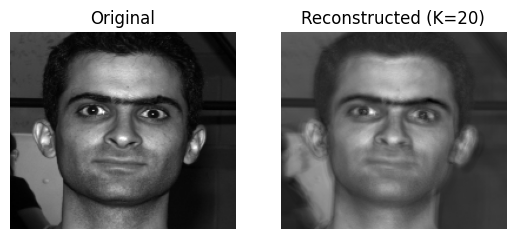

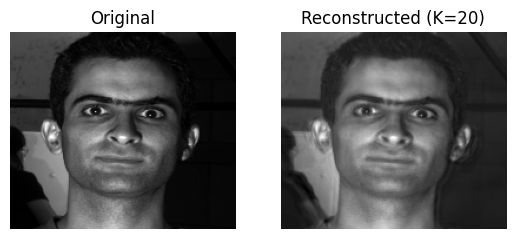

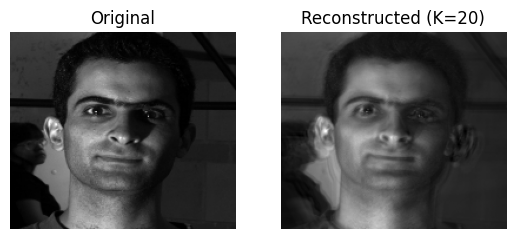

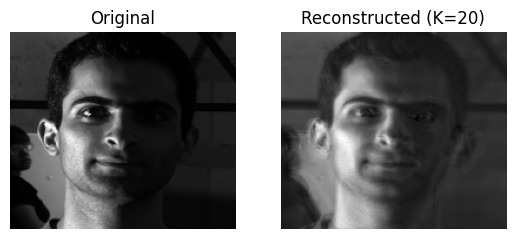

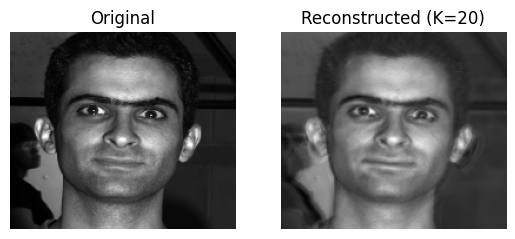

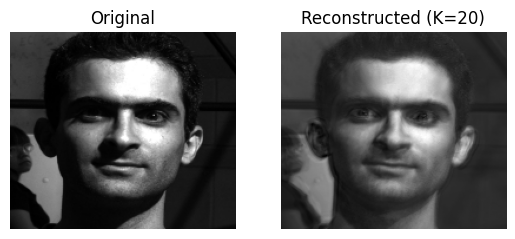

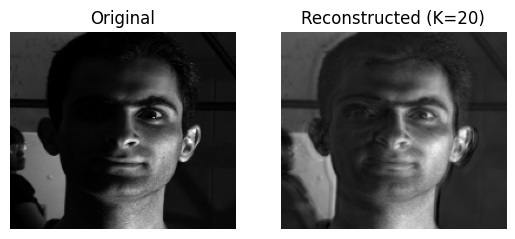

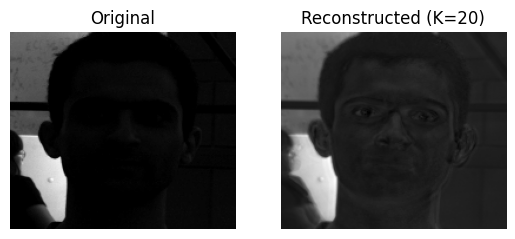

In [16]:
K_fixed = 20

for idx in selected_indices:
    Phi_img = Phi[:, idx:idx+1]
    original = Gamma[:, idx:idx+1]
    recon = reconstruct_image(Phi_img, K_fixed)

    original_img = original.reshape(H, W)
    recon_img = recon.reshape(H, W)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f"Reconstructed (K={K_fixed})")
    plt.axis("off")

    plt.show()


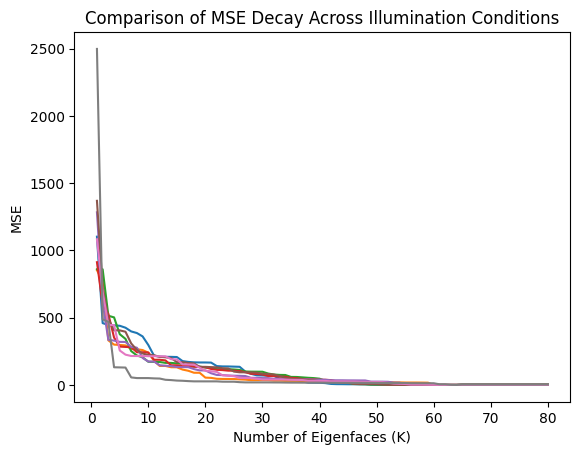

In [17]:
plt.figure()

for idx in selected_indices:
    plt.plot(range(1, 81), mse_results[idx])

plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("MSE")
plt.title("Comparison of MSE Decay Across Illumination Conditions")
plt.show()


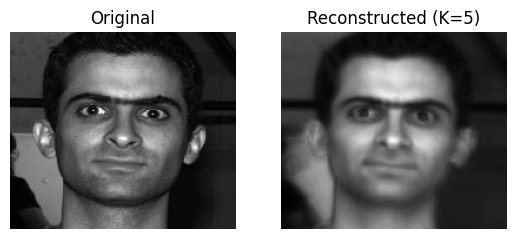

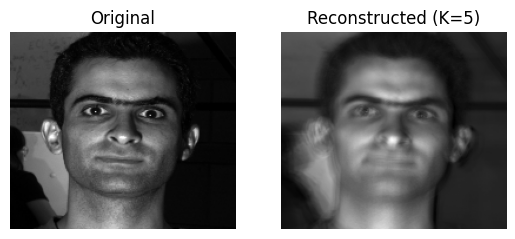

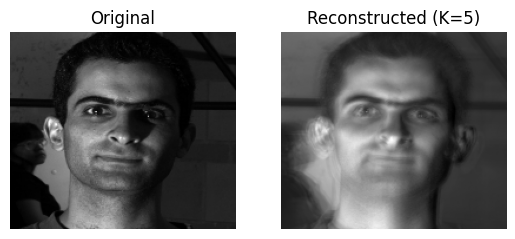

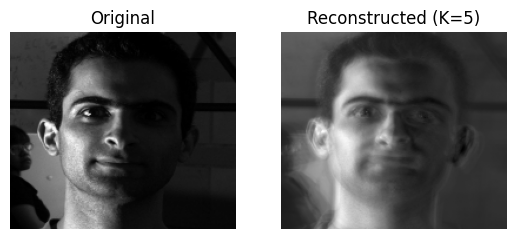

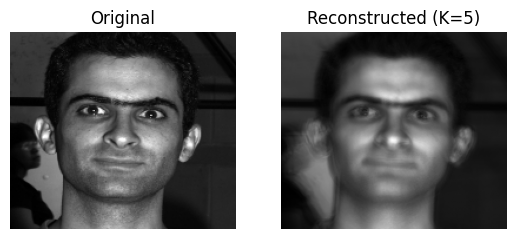

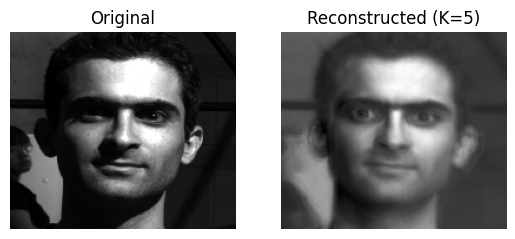

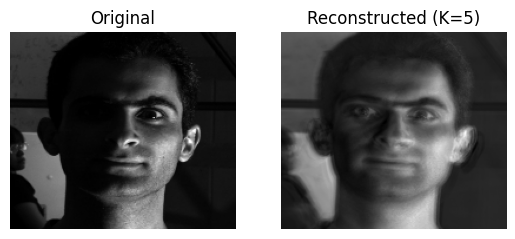

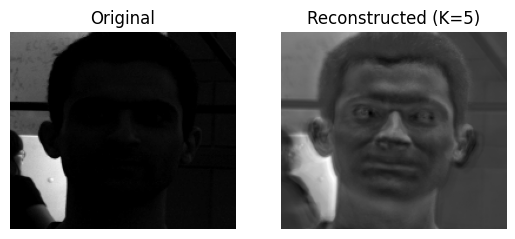

In [18]:
K_fixed = 5

for idx in selected_indices:
    Phi_img = Phi[:, idx:idx+1]
    original = Gamma[:, idx:idx+1]
    recon = reconstruct_image(Phi_img, K_fixed)

    original_img = original.reshape(H, W)
    recon_img = recon.reshape(H, W)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f"Reconstructed (K={K_fixed})")
    plt.axis("off")

    plt.show()
